# LECTURE 5: NEURAL NETWORKS PART ONE

## References
### Books

- Pattern recognition and machine learning, Christopher M. Bishop
- The Elements of Statistical Learning, Hastie, Tibshirani, and Friedman

### Blogs, code snippets, lecture notes, etc.

- <a href=https://github.com/stephencwelch/Neural-Networks-Demystified>$\texttt{https://github.com/stephencwelch/Neural-Networks-Demystified}$</a> This tutorial uses numpy and python
- <a href=http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/>$\texttt{http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/}$</a>  This tutorial implements a classifier in python from scratch
- <a href=http://deeplearning.net/tutorial/>$\texttt{http://deeplearning.net/tutorial/}$</a> This set of tutorials uses the Theano package, which is pretty tricky to learn (but very powerful because it calculates gradients for you automatically, among other things)
- <a href=http://www.cs.stir.ac.uk/courses/ITNP4B/lectures/kms/1-Intro.pdf>$\texttt{http://www.cs.stir.ac.uk/courses/ITNP4B/lectures/kms/1-Intro.pdf}$</a> For some of the history and possible connections to neuroscience


# Feed-forward neural networks

Feed-forward neural networks a.k.a. multilayer perceptrons are a convenient way of parameterizing general non-linear functions. 

The simplest neural network is given by the following set of transformations. First, given an input vector ${\bf x} \in \mathbb{R}^D$ we map it to ${\bf a} \in \mathbb{R}^M$ via an affine transformation defined by the weight matrix ${\bf W^{(1)}} \in \mathcal{M}_{MD}$ (i.e. ${\bf W^{(1)}}$ has $M$ rows and $D$ columns) and the bias vector ${\bf b^{(1)}} \in \mathbb{R}^M$:

$$\begin{equation}
{\bf a} = {\bf W^{(1)} x} + {\bf b^{(1)}}
\end{equation}$$

The $M{\rm -dimensional}$ vector ${\bf a}$ is called the activation. At this point the non-linearity enters the picture; we transform each component of ${\bf a}$ via a *fixed* (non-linear) activation function $h(\cdot)$, $h: \mathbb{R} \to \mathbb{R}$. Typical choices include the hypertangent function $\rm{tanh}(\cdot)$ and the logistic sigmoid function $\sigma(\cdot)$, which
is defined by 

$$\begin{equation}
\sigma(x) \equiv \frac{1}{1 + {\rm exp}(-x)}
\end{equation}$$

The transformed activations $z_i$ are referred to as the _hidden units_:

$$\begin{equation}
{\bf z} = h({\bf a}) \qquad \rm{i.e.} \qquad z_i = h(a_i) \qquad {\rm for} \qquad i=1,...,M
\end{equation}$$

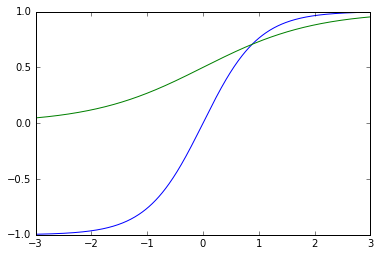

In [1]:
from __future__ import print_function, division
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3,3,500) 
y1 = np.tanh(x)
y2 = 1/(1+np.exp(-x))
plt.plot(x,y1); 
plt.plot(x,y2); 

At this point the activations typically have a finite range determined by the activation function. So typically we require one last transformation to get the output of the neural network to be in the range we want. For the present case, where we are implicitly using the neural network to approximate a function from $\mathbb{R}^D$ to $\mathbb{R}^K$, the final transformation will be another affine transformation, this time applied to the hidden units:

$$\begin{equation}
{\bf y} = {\bf W^{(2)} z} + {\bf b^{(2)}}
\end{equation}$$

Analagously to above, the weight matrix satisfies ${\bf W^{(2)}} \in \mathcal{M}_{KM}$ and the bias vector satisfies ${\bf b^{(2)}} \in \mathbb{R}^K$. Putting everything together, the entire set of transformations can be written as follows (with the hidden units only appearing implicitly):
"
$$\begin{equation}
{\bf y} = {\bf W^{(2)} \; h({\bf W^{(1)} x} + {\bf b^{(1)}})} + {\bf b^{(2)}}
\end{equation}$$

Again, this is a mapping from $\mathbb{R}^D$ to $\mathbb{R}^K$ (${\bf x \to y}$) parameterized in such a way that all the information passes through the hidden units ${\bf z} \in \mathbb{R}^M$. The parameters are the two weight matrices $\{ {\bf W^{(1)}}, {\bf W^{(2)}} \}$ and the two bias vectors $\{ {\bf b^{(1)}}, {\bf b^{(2)}} \}$.

# A neural network with a single hidden layer in graphical form

<img src="nn.png">

epoch: 20000  cost: 0.105944
epoch: 40000  cost: 0.097244
epoch: 60000  cost: 0.096083
epoch: 80000  cost: 0.093418
epoch: 100000  cost: 0.075045
epoch: 120000  cost: 0.074523
epoch: 140000  cost: 0.074449
epoch: 160000  cost: 0.074436
epoch: 180000  cost: 0.074459
epoch: 200000  cost: 0.074579
w: [[-0.84485647  3.47384405 -2.90832657  1.62679877  2.73228973]]


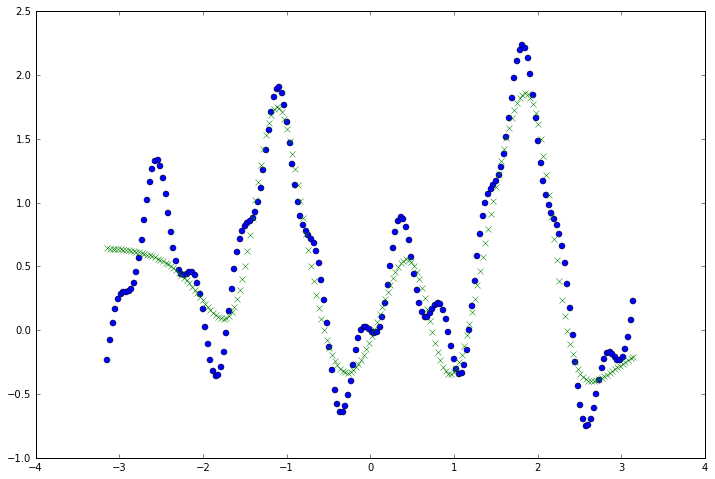

In [2]:
from function_approximator import FunctionApproximator
fa = FunctionApproximator(n_out=1, n_hidden=5)

def f(x):
    return np.sin(x)**2 - 0.3*np.sin(2.5*x) + np.sin(4.3*x)**3

X = np.linspace(-np.pi, np.pi, 200).reshape((200,1))
Y = f(X).reshape((200,))

fa.train(X, Y, learning_rate=0.05, n_epochs=200000, report_frequency=20000)
Y_pred = fa.get_y_pred()
fig = plt.figure(figsize=[12,8])
plt.plot(X, Y, 'o');
plt.plot(X, Y_pred, 'x');
[w,b]=fa.get_weights()
print("w:", w)

### Objective Function & Training
Before we generalize to other kinds of neural networks, let's take a moment to talk about training the neural network. That is to say, how do we choose the parameters $\Theta \equiv \{ {\bf W^{(1)}}, {\bf W^{(2)}}, {\bf b^{(1)}}, {\bf b^{(2)}} \}$?

As is often the case in machine learning, before we can determine how we're going to learn the parameters, we need to define the objection function that encodes what we mean by "good parameters." What is the criterion that we want to use to differentiate whether one set of parameters is better than another? For the function approximation case above, where we are using the neural network to encode a mapping from $\mathbb{R}^D$ to $\mathbb{R}^K$, the most natural (but my no means the only) objective function (or cost function) is the mean squared error. Given a training set $\mathcal{D} = \{ \bf x_i, y_i \}$ of size $N$, i.e. for each $i=1,2,...,N$ we have ${\bf x_i} \in \mathbb{R^D}$ and ${\bf y_i} \in \mathbb{R^K}$, we define the MSE as follows:

$$\begin{equation}
{\rm mse}(\mathcal{D}; \Theta) = \frac{1}{N}\sum_i \left| \left| {\bf y_i - \hat{y_i}}  \right | \right|^2
\end{equation}$$

Here ${\bf y_i}$ is the output the neural network is aiming to approximate, while ${\bf \hat{y_i}}$ is the output of the neural network, i.e. 

$$\begin{equation}
{\bf \hat{y_i}} = {\bf W^{(2)} \; h({\bf W^{(1)} x_i} + {\bf b^{(1)}})} + {\bf b^{(2)}}
\end{equation}$$

So we'll learn our parameters by setting up an optimization problem: choose the set of parameters $\Theta$ that minimizes the MSE. There are various strategies for doing this optimization, but notice that because the neural network itself encodes a very non-linear function, the objective function is highly non-linear as a function of the parameters. Such objective functions (especially for a large number of parameters) are in general difficult to optimize efficiently. Generally speaking, single-layer neural networks like the one we've defined above are trained via some form of gradient descent, which we now briefly describe.

### Gradient descent
This is a large subject and we're only going to touch the surface of numerical optimization techniques. The setup is the following. We have some objective function $\mathcal{O}(\mathcal{D}; \Theta)$ that for a given set of parameters $\Theta$ and given training dataset $\mathcal{D}$ results in a single real number that defines a criterion for the 'goodness' of the parameters $\Theta$. For a fixed dataset $\mathcal{D}$ we want to minimize $\mathcal{O}(\mathcal{D}; \Theta)$ as a function of $\Theta$. 

The gradient of $\mathcal{O}$ with respect to $\Theta$, 

$$\begin{equation}
\nabla_{\Theta} \mathcal{O}
\end{equation}$$

is a vector that tells us the direction (in the multi-dimensional space $\Theta$) where $\mathcal{O}$ is increasing most rapidly, i.e. it tells us how to go 'uphill.' Of course, we've defined our optimization problem as a minimization problem: we want to go downhill. So in order to find approximate minima of the function $\mathcal{O}$ we take small steps in the direction of the negative gradient:

$$\begin{equation}
\Theta_{\rm new} = \Theta_{\rm old} - \eta \nabla_{\Theta} \mathcal{O}(\Theta_{\rm old})
\end{equation}$$

That is, this equation tells us how we update the parameters: $\Theta_{\rm old} \to \Theta_{\rm new}$. We iterate this procedure until we're satisfied with the approximate minimum (e.g. we might demand that $\mathcal{O}$ remains constant from one iteration to the next within some tolerance $\epsilon = 1 \times 10^{-6}$).
The parameter $\eta$, with $\eta > 0$, usually called the learning rate, determines how big of steps we take in $\Theta$-space. A priori we have no idea how large or small $\eta$ should be. The objective function $\mathcal{O}$ could be a very non-linear function of $\Theta$ and the gradient only tells us _local_ information about that function. If we take a step in $\Theta$-space that is too large, we might end up in a completely different region far away from the desired minimum; it's important that we not overshoot and choose $\eta$ not too large. On the other hand, if we choose $\eta$ very small, it will take very many iterations to reach the minimum. In practice we have to choose a moderate value of $\eta$, usually chosen after some amount of trial and error with the given dataset.

Note that there is an entire world of algorithms that do numerical optimization using some kind of gradient information, and what we've described is only the simplest possibility. For example, for some objective functions it may be beneficial and computationally tractable to use 2nd-derivative information (the so called Hessian matrix) to better inform the step size in each iteration.


## Regularization of neural networks

For a sufficiently large number of hidden units, a neural network becomes an arbitrarily good function approximator. So for a fixed training set $\mathcal{D} = \{ \bf x_i, y_i \}$ with $N$ datapoints, the mean squared error of the learned neural network can be made arbitrarily small (assuming all the $\bf x_i$ are distinct). However, due to the possibility of overfitting, arbitrarily good performance on the _training set_ does not guarantee good performance on the _test set_. In order to get the lowest possible generalization error, it is generally important to include some kind of regularization. In practice what this means is that we limit the size of the class of approximators we are using. The simplest possibility would be to just make sure we don't choose an $M$, the number of hidden units, that is 'too high.' But what is too high? One way to choose an appropriate $M$ is to use a validation set during training or to do some kind of cross-fold validation.

Another approach to regularizing neural networks is to include terms in the objective function that penalize large weights. This forces the neural network to find high-performing parameters that are not overly complex. The simplest possibility is to add a quadratic term to the objective function (this is often referred to as _weight decay_ or _L2 regularization_):

$$\begin{equation}
\mathcal{L}_{\rm cost} \to \mathcal{L}_{\rm cost}  + \mathcal{L}_{\rm reg} \qquad {\rm with} \qquad  \mathcal{L}_{\rm reg} \equiv \lambda {\bf w^T w}
\end{equation}$$

where $\bf w$ is a vector holding all the parameters of the neural network that we'd like to regularize. Typically this would include the parameters in the weight matrices but _not_ the parameters in the bias vectors. It is also possible to differentiate between the parameters in different layers, with e.g. $\mathcal{L}_{\rm reg} = \lambda_1 {\bf w_1^T w_1} + \lambda_2 {\bf w_2^T w_2}$.

The regularization coefficient $\lambda$, with $\lambda>0$, controls how much the neural network is regularized. If $\lambda$ is very large, the parameters of the neural network will be encouraged to be as small as possible. Why does this sort of thing discourage overfitting? One way to understand this is as follows. Consider how the output $\bf y$ is calculated from the hidden units $\bf z$:

$$\begin{equation}
{\bf \hat y} = {\bf W^{(2)} z} + {\bf b^{(2)}}
\end{equation}$$

If the weights in $\bf W^{(2)}$ are allowed to be arbitrarily large, then the summation in ${\bf W^{(2)} z}$ might include terms that are very large in magnitude and positive as well as terms that are very large in magnitude and negative; consequently, the approximate equality of $\hat{y_i}$ and $y_i$ for a given $i$ might be due to a very delicate cancellation between huge numbers. This cancellation is likely to be messed up for new test points $\bf x_i$ where, for $\bf W^{(2)}$ with large elements, small changes in $\bf x$ can lead to huge change in ${\bf \hat y}$. So whether interpolating or extrapolating, we do not expect the neural network to generalize well to unseen data if the compoments of $\bf W^{(2)}$ are allowed to get arbitrarily large. Regularization helps avoid this kind of scenario.

## Example: the implications of regularizing a neural network

training unregulated neural network
epoch: 50000  cost: 0.085567
epoch: 100000  cost: 0.008068
epoch: 150000  cost: 0.007010
epoch: 200000  cost: 0.004668
epoch: 250000  cost: 0.002807
epoch: 300000  cost: 0.001933
training regulated neural network
epoch: 50000  cost: 0.279390
epoch: 100000  cost: 0.207167
epoch: 150000  cost: 0.207022
epoch: 200000  cost: 0.206936
epoch: 250000  cost: 0.206885
epoch: 300000  cost: 0.206823


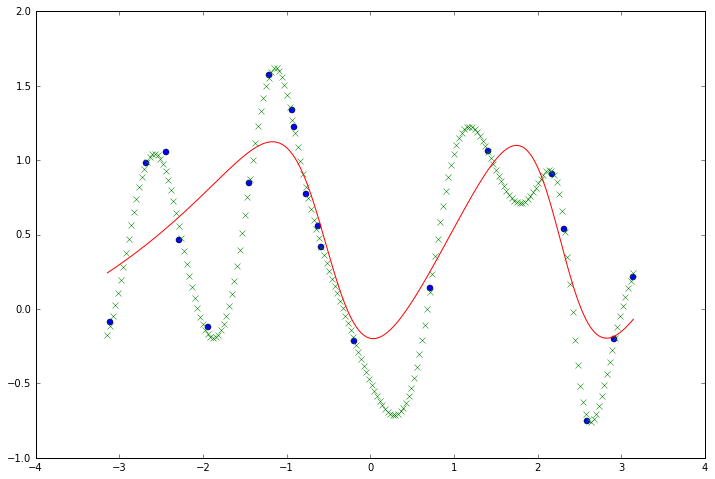

In [3]:
from function_approximator import FunctionApproximator
fa = FunctionApproximator(n_out=1, n_hidden=20)

def f(x):
    return np.sin(x)**2 - 0.3*np.sin(2.5*x) + np.sin(4.3*x)**3

n_points = 20
X_sparse = np.random.uniform(low=-np.pi, high=np.pi, size=n_points).reshape((n_points,1))
X_dense  = np.linspace(-np.pi, np.pi, 200).reshape((200,1))
Y_sparse = f(X_sparse).reshape((n_points,))

print("training unregulated neural network")
fa.train(X_sparse, Y_sparse, learning_rate=0.05, n_epochs=300000, report_frequency=50000)
Y_dense_pred = fa.get_y_pred(X_dense) # unregulated prediction

print("training regulated neural network")
fa.train(X_sparse, Y_sparse, learning_rate=0.05, n_epochs=300000, report_frequency=50000, lambda_l2=0.005)
Y_dense_pred_reg = fa.get_y_pred(X_dense) # regulated prediction

fig = plt.figure(figsize=[12,8]);
plt.plot(X_sparse, Y_sparse, 'o');
plt.plot(X_dense, Y_dense_pred, 'x');
plt.plot(X_dense, Y_dense_pred_reg, '-');
                      

# Neural networks for classification
To begin with let's consider the case where we have two classes; denote the target labels by $t=0$ and $t=1$. For any given input vector ${\bf x} \in \mathbb{R}^D$ we need to map it to $\hat{t} =0$ or $\hat{t} =1$. The most natural way to do this is as follows. Instead of using the neural network to directly parameterize a function from $\mathbb{R}^D$ to $\{0,1\}$, we instead use a neural network to parameterize a _probabilistic model_. That is for a given ${\bf x} \in \mathbb{R}^D$, we want to be able to calculate the class probabilities $P(t|\bf x)$, i.e. we want to be able to calculate $P(t=0|\bf x)$ and $P(t=1|\bf x)$. These two probabilities (which obviously sum up to 1) then implicitly define the actual classifier:

$$\begin{equation}
{\bf x} \to {\rm argmax}_t P(t|\bf x)
\end{equation}$$

That is to say, for a given ${\bf x} \in \mathbb{R}^D$, calculate the two probabilities $P(t|\bf x)$ and classify $\bf x$ with the label $t$ that yields the larger probability $P(t|\bf x)$. OK but how exactly do we parameterize $P(t|\bf x)$ with a neural network? Well $P(t|\bf x)$ is just a Bernoulli distribution defined by a single parameter $\eta$: with probability $\eta$ we have that $t=0$ and with probability $1-\eta$ we have that $t=1$. So for a given ${\bf x} \in \mathbb{R}^D$ we just need the neural network to output a real number $\eta$ with $0 \le \eta \le 1$. The easiest way to do this is to use the logistic sigmoid function defined above:

$$\begin{equation}
\sigma(x) \equiv \frac{1}{1 + {\rm exp}(-x)}
\end{equation}$$

For all $x$ we have that $0 \le \sigma(x) \le 1$. So the full recipe for our binary classifier is as follows. The activation is defined as above, expect in the present case we only have a single activation and a single hidden unit ($M=1$). The activation is simply given by

$$\begin{equation}
a = {\bf W^{(1)} x} + {\bf b^{(1)}}
\end{equation}$$

We then apply the logistic sigmoid function to the activation to get the single hidden unit

$$\begin{equation}
z = \sigma({ a}) 
\end{equation}$$

We then set our Bernoulli parameter $\eta$ to be given by the value of the hidden unit $z$. We can write this as follows:

$$\begin{equation}
P(t|{\bf x}) = P(t|\eta({\bf x}))
\end{equation}$$

where $\eta({\bf x})$ is the mapping parameterized by the neural network.


### The multi-class case

All of this can be straightforwardly generalized to the multi-class case with $N_c$ different classes. Now for any given input vector ${\bf x} \in \mathbb{R}^D$ we need to map it to $\hat{t} \in \{0, 1, 2, ..., N_c-1\}$. The simplest way to do this is as follows. This time we let our neural network have $M=N_c$ hidden units. We are going to use these $N_c$ hidden units to parameterize the probability $P(t|\bf x)$. Note that for a given $\bf x$ this probability distribution is fully defined by $N_c - 1$ parameters (which sum up to 1) but we have $N_c$ hidden units. To ensure that our $N_c$ hidden units sum to 1, we use the softmax function defined as follows:

$$\begin{equation}
{\rm softmax}(a_i) = \frac{\rm{exp}(a_i) } {\sum_{k=1}^{N_c} \rm{exp}(a_k)} \qquad {\rm for} \qquad i=1,...,N_c
\end{equation}$$

Thus for each $i$ ${\rm softmax}(a_i)$ is a real number that satisfies $0 \le {\rm softmax}(a_i) \le 1$ and the $N_c$ different numbers ${\rm softmax}(a_i)$ sum up to 1. So our probabilistic model is defined as follows:

$$\begin{equation}
P(t=i|{\bf x}) = {\rm softmax}(a_i({\bf x}))
\end{equation}$$


### Cost function for classification
We've now shown how we can define neural networks that do classification, but in order to train them (i.e. learn the parameters) we need to choose appropriate objective functions. Since our classifiers are defined via probabilistic models, the most straightforward way to do this is to use the negative log likelihood as the cost function. That is, for a dataset $\{ {\bf x_i}, t_i \}$ we define

$$\begin{equation}
{\rm NLL}= -\sum_i {\rm log} P(t_i | {\bf x_i})
\end{equation}$$

By minimizing the NLL we maximize the probability of the observed data for the given set of model parameters. As before this cost function can be used to set up an optimization problem that can be (approximately) solved via some sort of gradient descent algorithm.

## Example: classifying fake data
In this case we will use a 2-layer neural network with a tanh non-linearity followed by a softmax function on the output layer.

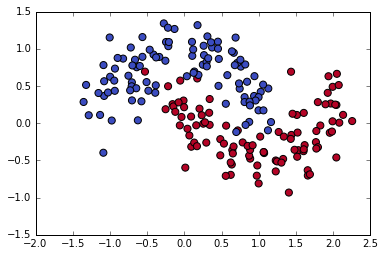

In [4]:
from sklearn.datasets import make_moons
np.random.seed(0)
X, Y = make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

using training set as test set...
using training set as validation set...
... building the model
... training the model
epoch 2000, minibatch 1/1, validation error 5.000000 %
epoch 2000, minibatch 1/1, test error of best model 5.000000 %
epoch 4000, minibatch 1/1, validation error 3.500000 %
epoch 4000, minibatch 1/1, test error of best model 3.500000 %
epoch 6000, minibatch 1/1, validation error 3.000000 %
epoch 6000, minibatch 1/1, test error of best model 3.000000 %
epoch 8000, minibatch 1/1, validation error 2.500000 %
epoch 8000, minibatch 1/1, test error of best model 2.500000 %
epoch 10000, minibatch 1/1, validation error 2.500000 %
epoch 12000, minibatch 1/1, validation error 2.500000 %
epoch 14000, minibatch 1/1, validation error 2.500000 %
Optimization complete with best validation score of 2.500000 %,with test performance 2.500000 %
The code ran for 15999 epochs, with 6900.939100 epochs/sec


The code for file neural_classifier.py ran for 2.3s


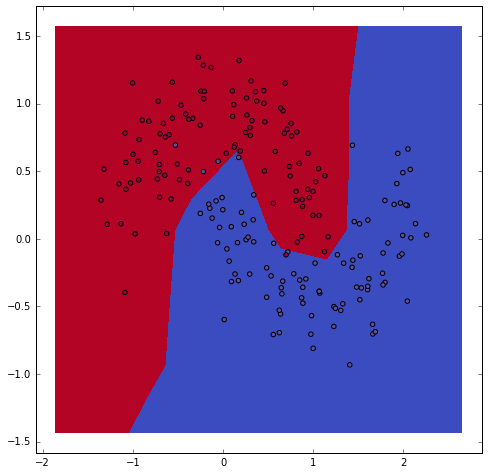

In [6]:
from neural_classifier import neural_classifier

nc = neural_classifier()
nc.train(learning_rate=0.1, n_epochs=40000,
          X_train=X, Y_train=Y, batch_size=len(Y), print_frequency=2000,
          n_in=2, n_out=2, n_hidden=4, n_layers=2)
#[test_pred, test_data, test_labels] = nc.get_test_pred(0)
#print(test_pred[0:20])
#print(test_labels[0:20])
nc.plot_decision_boundary(plt, X, Y)

## Example: classifying digits
Even a relatively simple single-layer neural network as described in the section "Neural networks for classification" can do a pretty good job at multi-class classification for a dataset as complex as hand-written digits. The following code snippet implements a 10-class classifier, where the input $\bf x$ is a vector of length $28 \times 28 = 784$ where each compoment corresponds to a single pixel of the digitized image (for each component $x_i$ we have $0 \le x_i \le1$).

In [5]:
from neural_classifier import neural_classifier

nc = neural_classifier()
nc.train(learning_rate=0.10, n_epochs=40,
          dataset_path='mnist.pkl.gz', batch_size=600,
          n_in=28*28, n_out=10, n_layers=1, print_frequency=500)
[test_pred, test_data, test_labels] = nc.get_test_pred(0)

... loading data
... building the model
... training the model
epoch 7, minibatch 2/83, validation error 9.718750 %
epoch 7, minibatch 2/83, test error of best model 9.812500 %
epoch 13, minibatch 4/83, validation error 8.927083 %
epoch 13, minibatch 4/83, test error of best model 8.739583 %
epoch 19, minibatch 6/83, validation error 8.625000 %
epoch 19, minibatch 6/83, test error of best model 8.322917 %
epoch 25, minibatch 8/83, validation error 8.416667 %
epoch 25, minibatch 8/83, test error of best model 8.125000 %
epoch 31, minibatch 10/83, validation error 8.260417 %
epoch 31, minibatch 10/83, test error of best model 7.927083 %
epoch 37, minibatch 12/83, validation error 8.104167 %
epoch 37, minibatch 12/83, test error of best model 7.979167 %
Optimization complete with best validation score of 8.104167 %,with test performance 7.979167 %
The code ran for 40 epochs, with 8.351839 epochs/sec


The code for file neural_classifier.pyc ran for 4.8s


### Visualizing the test set performance

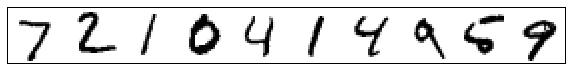

prediction:  [ 7   2   1   0   4   1   4   9   6   9 ]
labels:      [ 7   2   1   0   4   1   4   9   5   9 ]


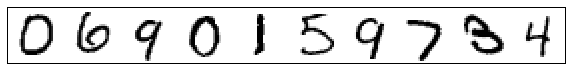

prediction:  [ 0   6   9   0   1   5   9   7   3   4 ]
labels:      [ 0   6   9   0   1   5   9   7   3   4 ]


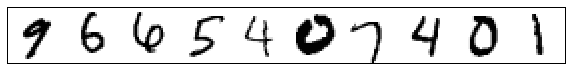

prediction:  [ 9   6   6   5   4   0   7   4   0   1 ]
labels:      [ 9   6   6   5   4   0   7   4   0   1 ]


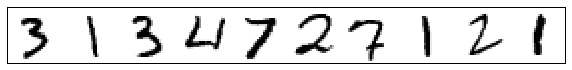

prediction:  [ 3   1   3   6   7   2   7   1   2   1 ]
labels:      [ 3   1   3   4   7   2   7   1   2   1 ]


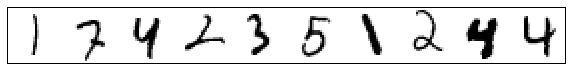

prediction:  [ 1   7   4   2   3   5   1   2   4   4 ]
labels:      [ 1   7   4   2   3   5   1   2   4   4 ]


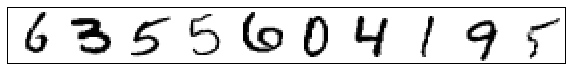

prediction:  [ 6   3   5   5   6   0   4   1   9   5 ]
labels:      [ 6   3   5   5   6   0   4   1   9   5 ]


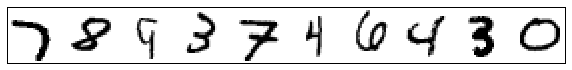

prediction:  [ 7   8   9   2   7   4   6   4   3   0 ]
labels:      [ 7   8   9   3   7   4   6   4   3   0 ]


In [6]:
import matplotlib

def display_slice(slice, n_print=10):
    offset = slice*n_print
    test_images = [test_data[offset+i,:].reshape((28,28)) for i in range(n_print)]
    fig = plt.figure(figsize=[n_print,1])
    ax = fig.add_subplot(1, 1, 1)
    test_image_slice = np.concatenate(test_images, axis=1)
    ax.matshow(test_image_slice, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show();
    print("prediction: ", " ".join(str(test_pred[offset:n_print+offset])))
    print("labels:     ", " ".join(str(test_labels[offset:n_print+offset])))

for i in range(7):
    display_slice(i)
